# NHL Draft dataset
# Modeling
# Records
## Most Goals by a Rookie in a Single Season
This notebook presents modeling performed on NHL Records data obtained from NHL Records API Records endpoint.
### Data collection summary
Dataset generated from a JSON received from the NHL Records API, contains response to the request for all draft records.

For details, see notebook `notebooks/feature_extraction/nhl_api.ipynb`.

## Preparations
### Import dependencies

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from time import time
import os
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

os.chdir('Documents/repos/nhl_draft/') # might need to comment this out

from src.io_utils import csv_to_df_rec
from src.plot_utils import plot_decision_regions

sns.set()
os.listdir()

['.git',
 '.gitattributes',
 '.gitignore',
 '.idea',
 'data',
 'img',
 'main.py',
 'methodology',
 'models',
 'notebooks',
 'README.md',
 'requirements.txt',
 'src']

### Load data

In [2]:
rec_name = 'most-goals-rookie-one-season'
suffix = '_new_cols'
df, name = csv_to_df_rec(rec_name, suffix)

----- NHL Records
--- Most Goals, Rookie, Season 

----- DataFrame with NHL Records Data loaded
in 0.22 seconds
with 3,377 rows
and 62 columns
-- Column names:
 Index(['activePlayer', 'assists', 'assistsPerGpMin20', 'firstGoals',
       'firstName', 'fiveGoalGames', 'fourGoalGames', 'gameWinningGoals',
       'gamesInSchedule', 'gamesPlayed', 'goals', 'goalsPerGpMin20',
       'goalsPerGpMin50', 'id', 'lastName', 'overtimeAssists', 'overtimeGoals',
       'overtimePoints', 'penalties', 'penaltyMinutes', 'playerId', 'points',
       'pointsPerGpMin50', 'positionCode', 'powerPlayGoals', 'rookieFlag',
       'seasonId', 'sevenGoalGames', 'shorthandedGoals', 'shots',
       'sixGoalGames', 'teamAbbrevs', 'teamNames', 'threeGoalGames',
       'threeOrMoreGoalGames', 'assists_norm', 'firstGoals_norm',
       'gameWinningGoals_norm', 'gamesPlayed_norm', 'goals_norm',
       'overtimeGoals_norm', 'overtimePoints_norm', 'penalties_norm',
       'penaltyMinutes_norm', 'points_norm', 'powerPlayGo

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3377 entries, 0 to 3376
Data columns (total 62 columns):
activePlayer             3377 non-null bool
assists                  3377 non-null int64
assistsPerGpMin20        731 non-null float64
firstGoals               3377 non-null int64
firstName                3377 non-null object
fiveGoalGames            308 non-null float64
fourGoalGames            308 non-null float64
gameWinningGoals         3377 non-null int64
gamesInSchedule          3377 non-null int64
gamesPlayed              3377 non-null int64
goals                    3377 non-null int64
goalsPerGpMin20          340 non-null float64
goalsPerGpMin50          4 non-null float64
id                       3377 non-null int64
lastName                 3377 non-null object
overtimeAssists          3377 non-null int64
overtimeGoals            3377 non-null int64
overtimePoints           3377 non-null int64
penalties                3377 non-null int64
penaltyMinutes           3377 non-

## Select features and target
### Two features: goals and assists
#### Perceptron

In [4]:
xcol1 = 'goals'
xcol2 = 'assists'
ycol = 'def'
X = df[[xcol1, xcol2]]
y = df[ycol]

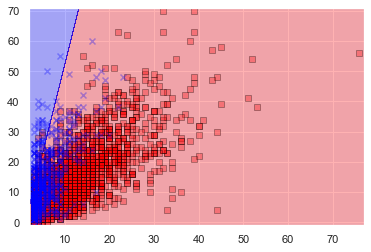

In [5]:
model = Perceptron(max_iter=40, eta0=0.1, random_state=1)
model.fit(X, y)
plot_decision_regions(df, xcol1, xcol2, ycol, classifier=model, alpha=0.3)

#### Logistic regression

C:\Anaconda3\envs\nhl_draft\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


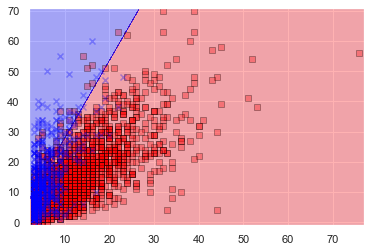

In [6]:
model = LogisticRegression(C=100.0, random_state=1)
model.fit(X, y)
plot_decision_regions(df, xcol1, xcol2, ycol, classifier=model, alpha=0.3)

#### Maximum margin classification with support vector machines

C:\Anaconda3\envs\nhl_draft\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


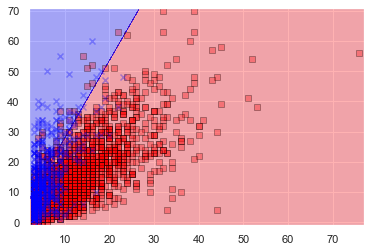

In [8]:
model = SVC(kernel='linear', C=1.0, random_state=1)
model.fit(X, y)
plot_decision_regions(df, xcol1, xcol2, ycol, classifier=model, alpha=0.3)

#### Solving nonlinear problems using a kernel SVM

C:\Anaconda3\envs\nhl_draft\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


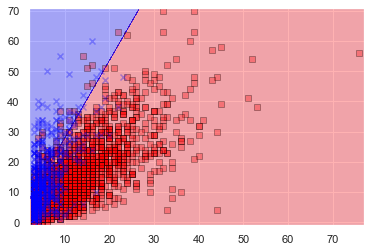

In [12]:
model = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
model.fit(X, y)
plot_decision_regions(df, 'goals', 'assists', 'def', classifier=model, alpha=0.3)

#### Decision tree learning

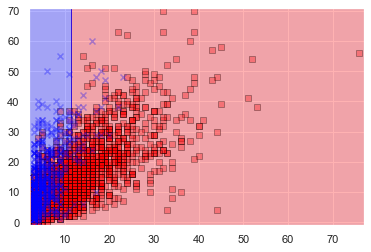

In [15]:
model = DecisionTreeClassifier(criterion='gini',
                               max_depth=4, 
                               random_state=1)
model.fit(X, y)
plot_decision_regions(df, 'goals', 'assists', 'def', classifier=model, alpha=0.3)

#### Combining multiple decision trees via random forests

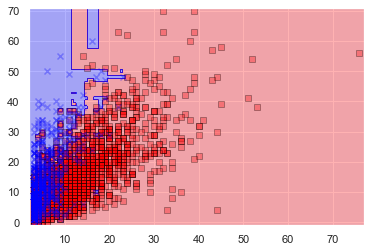

In [18]:
model = RandomForestClassifier(criterion='gini',
                               n_estimators=25,
                               random_state=1,
                               n_jobs=2)
model.fit(X, y)
plot_decision_regions(df, 'goals', 'assists', 'def', classifier=model, alpha=0.3)

#### K-nearest neighbors – a lazy learning algorithm

In [21]:
model = KNeighborsClassifier(n_neighbors=5, p=2,
                           metric='minkowski')
model.fit(X, y)
plot_decision_regions(df, 'goals', 'assists', 'def', classifier=model, alpha=0.3)

KeyboardInterrupt: 

In [28]:
mask = pd.Series(df.columns).str.contains('std')
x_cols = df.columns[mask]
X = df[x_cols]

### Multi-class classification

In [25]:
le = LabelEncoder()
df['pos'] = le.fit_transform(df['positionCode'])
print("Positions encoded!")

Positions encoded!


In [28]:
xcol1 = 'goals'
xcol2 = 'assists'
ycol = 'pos'
X = df[[xcol1, xcol2]]
y = df[ycol]

C:\Anaconda3\envs\nhl_draft\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\envs\nhl_draft\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


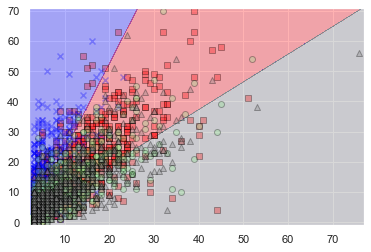

In [30]:
model = LogisticRegression(C=100.0, random_state=1)
model.fit(X, y)
plot_decision_regions(df, xcol1, xcol2, ycol, classifier=model, alpha=0.3)

In [ ]:
model = SVC(kernel='linear', C=1.0, random_state=1)
model.fit(X, y)
plot_decision_regions(df, xcol1, xcol2, ycol, classifier=model, alpha=0.3)

C:\Anaconda3\envs\nhl_draft\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\envs\nhl_draft\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


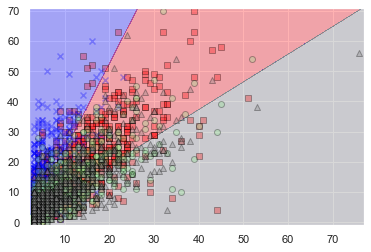

In [33]:
model = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
model.fit(X, y)
plot_decision_regions(df, xcol1, xcol2, ycol, classifier=model, alpha=0.3)

In [ ]:
model = DecisionTreeClassifier(criterion='gini',
                               max_depth=4, 
                               random_state=1)

In [ ]:
model = RandomForestClassifier(criterion='gini',
                               n_estimators=25,
                               random_state=1,
                               n_jobs=2)

### All features
